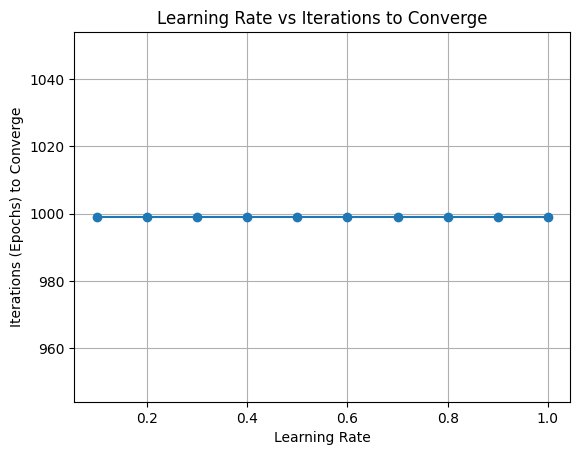

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Summation Unit: Calculates the weighted sum of inputs and corresponding weights
def summation_unit(inputs, weights):
    """
    Calculate the weighted sum of inputs and weights.

    Args:
        inputs (array-like): The input feature vector.
        weights (array-like): The weight vector.

    Returns:
        float: Weighted sum (dot product) of inputs and weights.
    """
    return np.dot(inputs, weights)

# Activation Functions

def step_activation(weighted_sum):
    """
    Step activation function.
    Returns 1 if weighted sum >= 0, otherwise returns 0.
    """
    return 1 if weighted_sum >= 0 else 0

def bipolar_step_activation(weighted_sum):
    """
    Bipolar step activation function.
    Returns:
        1 if weighted sum > 0
        0 if weighted sum == 0
        -1 if weighted sum < 0
    """
    if weighted_sum > 0:
        return 1
    elif weighted_sum == 0:
        return 0
    else:
        return -1

def sigmoid_activation(weighted_sum):
    """
    Sigmoid activation function.
    Returns a value between 0 and 1.
    """
    return 1 / (1 + np.exp(-weighted_sum))

def tanh_activation(weighted_sum):
    """
    Hyperbolic tangent activation function (tanh).
    Returns a value between -1 and 1.
    """
    return np.tanh(weighted_sum)

def relu_activation(weighted_sum):
    """
    Rectified Linear Unit (ReLU) activation function.
    Returns 0 if the weighted sum is less than 0, otherwise returns the weighted sum.
    """
    return max(0, weighted_sum)

def leaky_relu_activation(weighted_sum, alpha=0.01):
    """
    Leaky ReLU activation function.
    Returns a small negative slope if the weighted sum is less than 0, otherwise returns the weighted sum.
    """
    return weighted_sum if weighted_sum > 0 else alpha * weighted_sum

# Comparator Unit: Calculates the error between predicted and target output
def comparator(target, predicted):
    """
    Calculates the error (difference) between the target and predicted value.

    Args:
        target (int): Actual target value.
        predicted (int): Predicted value from the perceptron.

    Returns:
        float: Error value (target - predicted).
    """
    return target - predicted

# Perceptron Training Function
def train_perceptron(X, y, activation_func, learning_rate, max_epochs=1000, error_threshold=0.002, initial_weights=None):
    """
    Trains the perceptron using the provided activation function and learning rate.

    Args:
        X (numpy.ndarray): Input data (feature vectors).
        y (numpy.ndarray): Target labels.
        activation_func (function): Activation function to use.
        learning_rate (float): Learning rate for weight updates.
        max_epochs (int): Maximum number of epochs for training.
        error_threshold (float): Threshold for total error to stop training.
        initial_weights (numpy.ndarray): Initial weight vector.

    Returns:
        numpy.ndarray: Final trained weights.
        int: Number of epochs until convergence or reaching max_epochs.
    """
    num_features = X.shape[1]  # Number of features in the dataset

    # Initialize weights (including bias) if not provided
    if initial_weights is None:
        weights = np.random.rand(num_features + 1)  # Add bias weight
    else:
        weights = initial_weights

    for epoch in range(max_epochs):
        total_error = 0

        # Iterate over each sample in the dataset
        for i in range(len(X)):
            # Calculate the net input (weighted sum + bias)
            net_input = summation_unit(X[i], weights[:-1]) + weights[-1]

            # Get the predicted output using the activation function
            predicted_output = activation_func(net_input)

            # Calculate the error
            error = comparator(y[i], predicted_output)
            total_error += error ** 2

            # Update weights and bias
            weights[:-1] += learning_rate * error * X[i]  # Update feature weights
            weights[-1] += learning_rate * error  # Update bias weight

        # If total error is below the threshold, stop training
        if total_error <= error_threshold:
            break

    return weights, epoch

# Preprocessing: Convert English and Hindi text data into numerical format using TF-IDF
def preprocess_data(df):
    """
    Preprocesses the input data by converting English and Hindi text columns to TF-IDF vectors.

    Args:
        df (pandas.DataFrame): Dataframe containing the 'ENGLISH' and 'HINDI' columns.

    Returns:
        numpy.ndarray: Combined feature vectors for English and Hindi text.
        numpy.ndarray: Target labels (for demonstration, random values are used).
    """
    # Vectorize English and Hindi columns using TF-IDF
    tfidf_vectorizer_english = TfidfVectorizer()
    tfidf_vectorizer_hindi = TfidfVectorizer()

    # Convert text to TF-IDF feature vectors
    X_english = tfidf_vectorizer_english.fit_transform(df['ENGLISH']).toarray()
    X_hindi = tfidf_vectorizer_hindi.fit_transform(df['HINDI']).toarray()

    # Combine English and Hindi feature vectors
    X = np.hstack((X_english, X_hindi))

    # Generate random binary targets (0 or 1) for demonstration purposes
    y = np.random.randint(0, 2, size=X.shape[0])

    return X, y

# Main function to run the experiment with varying learning rates
def main():
    # Load the dataset (English to Hindi translation data)
    file_path = 'Book1.xlsx'
    df = pd.read_excel(file_path)

    # Select the relevant columns: 'ENGLISH' and 'HINDI'
    df = df[['ENGLISH', 'HINDI']]

    # Preprocess data to obtain feature vectors and target labels
    X, y = preprocess_data(df)

    # Adjust the initial weights to match the size of the input features
    num_features = X.shape[1]
    initial_weights = np.random.rand(num_features + 1)  # Initializing weights for each feature and bias term

    # Activation function to use (Bipolar step with 3 conditions)
    activation_func = bipolar_step_activation

    # Define learning rates to test
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    epochs_to_converge = []  # List to store the number of epochs for each learning rate

    # Train the perceptron for each learning rate and record the number of epochs
    for lr in learning_rates:
        _, epochs = train_perceptron(X, y, activation_func, lr, initial_weights=initial_weights)
        epochs_to_converge.append(epochs)

    # Plot learning rate vs iterations (epochs to converge)
    plt.plot(learning_rates, epochs_to_converge, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations (Epochs) to Converge')
    plt.title('Learning Rate vs Iterations to Converge')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
